<a href="https://colab.research.google.com/github/AmalBouhdid/Deep-Learning-Assignment/blob/main/Task_1_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1: Time Series**

## **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploratory Data Analysis**

***Loading the Data***

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/DL/DeepLearning/TemperatureRainFall.csv")

In [ ]:
data.head(10)

,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
0,01/12/2008,13.4,22.9,16.9,21.8,0.6
1,02/12/2008,7.4,25.1,17.2,24.3,0.0
2,03/12/2008,12.9,25.7,21.0,23.2,0.0
3,04/12/2008,9.2,28.0,18.1,26.5,0.0
4,05/12/2008,17.5,32.3,17.8,29.7,1.0
5,06/12/2008,14.6,29.7,20.6,28.9,0.2
6,07/12/2008,14.3,25.0,18.1,24.6,0.0
7,08/12/2008,7.7,26.7,16.3,25.5,0.0
8,09/12/2008,9.7,31.9,18.3,30.2,0.0
9,10/12/2008,13.1,30.1,20.1,28.2,1.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3011 non-null   object 
 1   MinTemp   3005 non-null   float64
 2   MaxTemp   3010 non-null   float64
 3   9amTemp   3007 non-null   float64
 4   3pmTemp   3007 non-null   float64
 5   Rainfall  2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 141.3+ KB


In [ ]:
data.describe()

,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
count,3005.000000,3010.000000,3007.000000,3007.000000,2991.000000
mean,9.520899,22.630963,14.348620,21.364716,1.925710
std,6.062028,7.796728,6.373137,7.525479,6.249052
min,-2.800000,6.800000,0.300000,6.400000,0.000000
25%,4.700000,15.800000,9.200000,14.900000,0.000000
50%,9.100000,21.900000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,19.300000,27.200000,0.400000
max,28.300000,44.800000,34.500000,43.400000,104.200000


In [ ]:
data.isnull().sum()

,0
Date,0
MinTemp,6
MaxTemp,1
9amTemp,4
3pmTemp,4
Rainfall,20


***Checking For Missing Values***

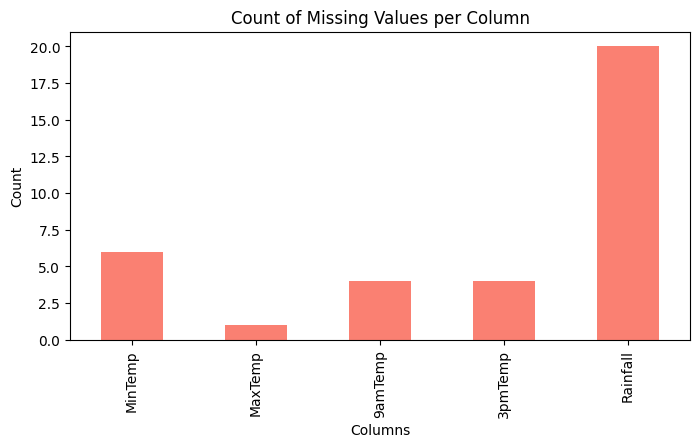

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of missing values count
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Check if there are any missing values to plot
if not missing_values.empty:
    plt.figure(figsize=(8, 4))
    missing_values.plot(kind='bar', color='salmon')
    plt.title("Count of Missing Values per Column")
    plt.ylabel("Count")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values to plot after preprocessing.")

***Correlation Matrix***

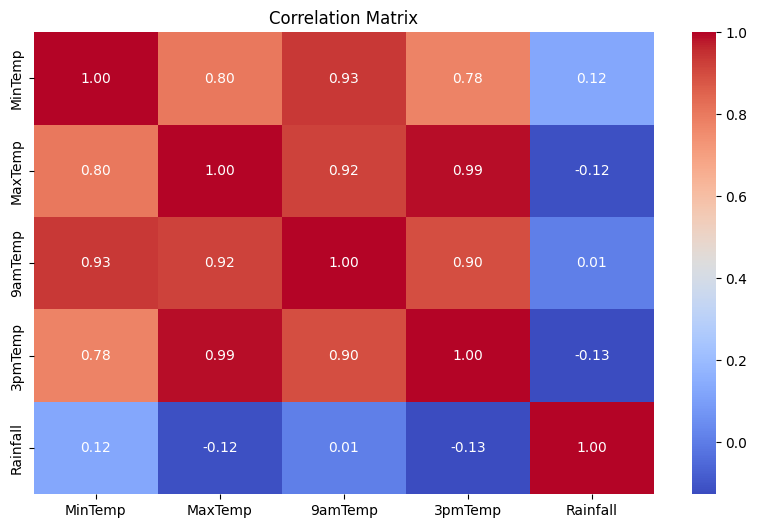

In [ ]:
# Step 6: Compute and visualize the correlation matrix
import seaborn as sns

# Compute correlation
correlation_matrix = data.drop("Date", axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

***Visualization of Trends***

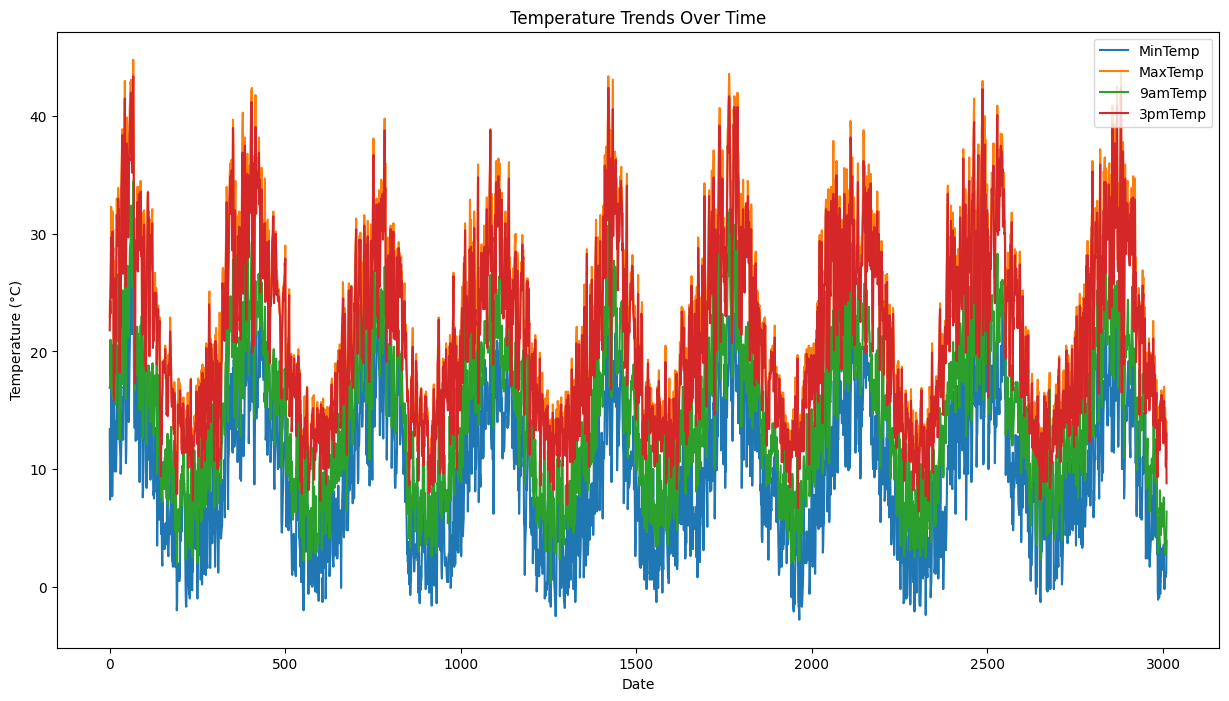

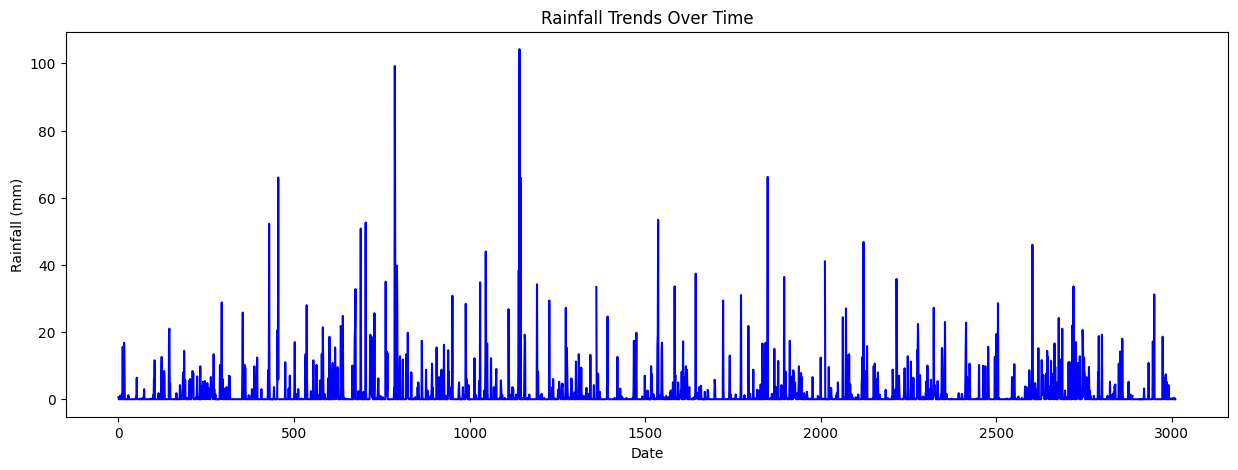

In [ ]:
import matplotlib.pyplot as plt

# Plot temperature trends
data[['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp']].plot(figsize=(15, 8))
plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(loc="best")
plt.show()

# Plot rainfall trends
data['Rainfall'].plot(figsize=(15, 5), color='blue')
plt.title("Rainfall Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.show()

***Box Plot Analysis***

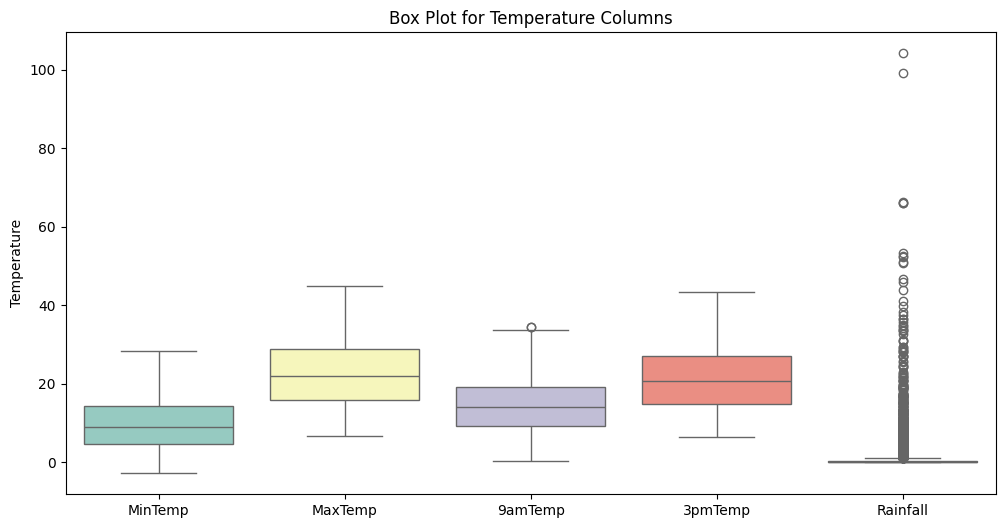

In [ ]:
# Box plot for temperature columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', "Rainfall"]], palette="Set3")
plt.title("Box Plot for Temperature Columns")
plt.ylabel("Temperature")
plt.show()

***Handling Missing Values***

In [ ]:
# Use linear interpolation for temperature columns:
data['MinTemp'] = data['MinTemp'].interpolate(method='linear')
data['MaxTemp'] = data['MaxTemp'].interpolate(method='linear')
data['9amTemp'] = data['9amTemp'].interpolate(method='linear')
data['3pmTemp'] = data['3pmTemp'].interpolate(method='linear')

# Fill missing values in Rainfall with mean
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)

# Verify if missing values are handled
data.isnull().sum()

<ipython-input-35-b01a55a2d3c5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)


,0
Date,0
MinTemp,0
MaxTemp,0
9amTemp,0
3pmTemp,0
Rainfall,0


## ***Stationarity Test***

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on each column
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")

# Test for MinTemp
print("ADF Test for MinTemp:")
adf_test(data['MinTemp'])
print("---")
print("ADF Test for MaxTemp:")
adf_test(data['MaxTemp'])
print("---")
print("ADF Test for 9amTemp:")
adf_test(data['9amTemp'])
print("---")
print("ADF Test for 3pmTemp:")
adf_test(data['3pmTemp'])
print("---")
print("ADF Test for Rainfall:")
adf_test(data['Rainfall'])

ADF Test for MinTemp:
ADF Statistic: -3.4342880431887304
p-value: 0.009844072710555204
Stationary
---
ADF Test for MaxTemp:
ADF Statistic: -3.403732364177441
p-value: 0.010832291714880383
Stationary
---
ADF Test for 9amTemp:
ADF Statistic: -3.2871864949675653
p-value: 0.015461044888542731
Stationary
---
ADF Test for 3pmTemp:
ADF Statistic: -3.356876259746718
p-value: 0.012519797902867997
Stationary
---
ADF Test for Rainfall:
ADF Statistic: -25.025832774048027
p-value: 0.0
Stationary


## ***Seasonal Decomposition***

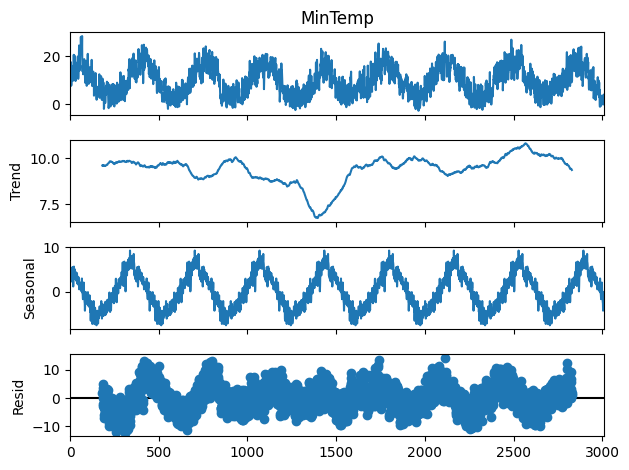

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for one variable (e.g., MinTemp)
decomposition = seasonal_decompose(data['MinTemp'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

Decomposition for MinTemp:


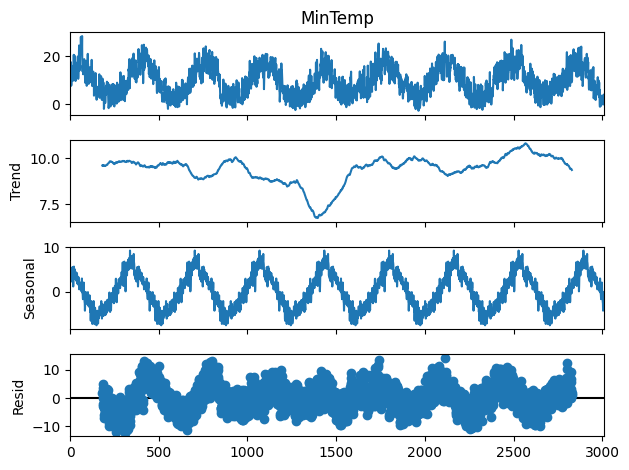

Decomposition for MaxTemp:


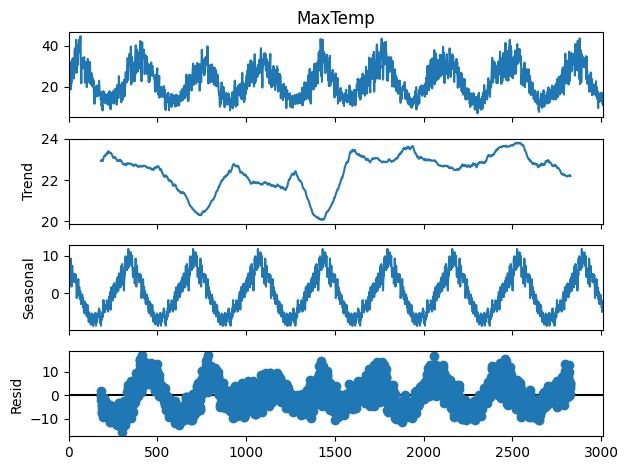

Decomposition for 9amTemp:


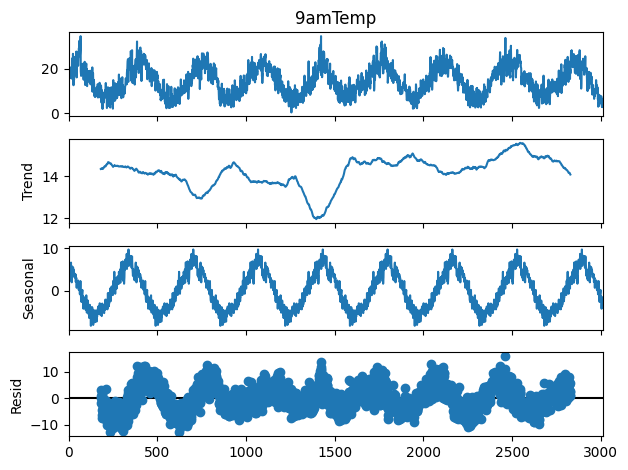

Decomposition for 3pmTemp:


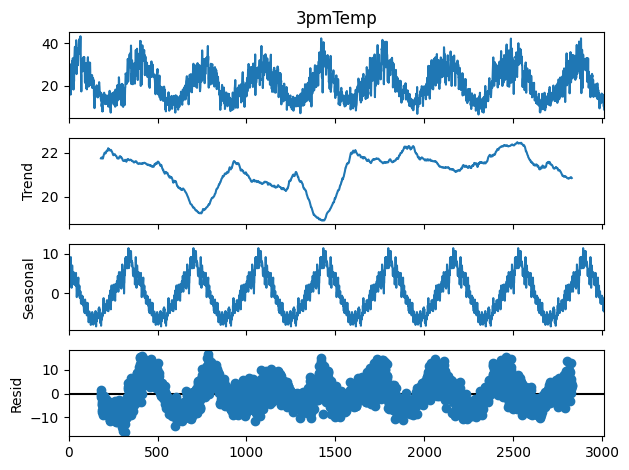

Decomposition for Rainfall:


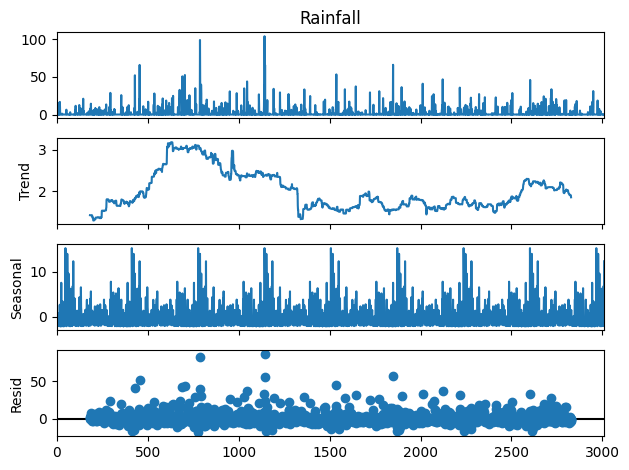

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Function to decompose time series and plot components
def decompose_and_plot(series, column_name, period=365):
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # Plot the decomposed components
    print(f"Decomposition for {column_name}:")
    decomposition.plot()
    plt.show()

# List of columns to decompose
columns_to_decompose = ['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', 'Rainfall']

# Apply decomposition and plot for each column
for column in columns_to_decompose:
    decompose_and_plot(data[column], column)

## **Prediction Using LSTM**

***Sequence Preparation***

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select the features and target (they are the same in this case)
features = ['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', 'Rainfall']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Convert to DataFrame for easier handling
scaled_data = pd.DataFrame(scaled_data, columns=features, index=data.index)

# Create sequences for LSTM
def create_sequences_multivariate(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length].values)  # Multiple targets
    return np.array(X), np.array(y)

# Create sequences
seq_length = 15
X, y = create_sequences_multivariate(scaled_data, seq_length)

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2396, 15, 5)
Testing data shape: (600, 15, 5)


***Model Architecture***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and parameters
checkpoint_path = "model_checkpoint.keras"  # Change the extension to .keras
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',   # Monitor validation loss
    save_best_only=True,  # Save only the model with the best validation loss
    verbose=1
)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    LSTM(32),
    Dropout(0.1),
    Dense(len(features))  # Output the same number of values as target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 15, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,501 (119.14 KB)

 Trainable params: 30,501 (119.14 KB)

 Non-trainable params: 0 (0.00 B)

***Train and Evaluate Model***

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint]
)

Epoch 1/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0559
Epoch 1: val_loss improved from inf to 0.00965, saving model to model_checkpoint.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0551 - val_loss: 0.0097
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116
Epoch 2: val_loss improved from 0.00965 to 0.00939, saving model to model_checkpoint.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 3/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0106
Epoch 3: val_loss did not improve from 0.00939
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 4/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110
Epoch 4: val_loss improved from 0.00939 to 0.00872, saving model to model_checkpoint.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - val_loss: 0.0087
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105
Epoch 5: val_loss did not improve from 0.00872
75/75 ━━━━━

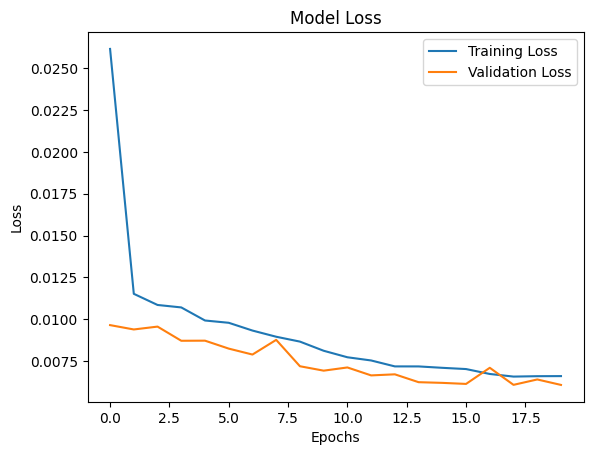

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066
Test Loss: 0.006077933125197887


In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled data to get actual values
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred)

# Calculate MSE and MAE for each feature
for i in range(len(features)):
    mse = mean_squared_error(y_test_original[:, i], y_pred_original[:, i])
    mae = mean_absolute_error(y_test_original[:, i], y_pred_original[:, i])
    print(f"Feature: {features[i]}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print("---")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Feature: MinTemp
MSE: 6.8801891420363575
MAE: 2.0910328538417815
---
Feature: MaxTemp
MSE: 10.384873749476561
MAE: 2.4835539528528847
---
Feature: 9amTemp
MSE: 5.635848305919597
MAE: 1.8640667894681295
---
Feature: 3pmTemp
MSE: 12.59390555755047
MAE: 2.6631459868748983
---
Feature: Rainfall
MSE: 22.43941195967922
MAE: 3.0499489518168073
---


***Making Predictions***

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Rescale predictions back to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


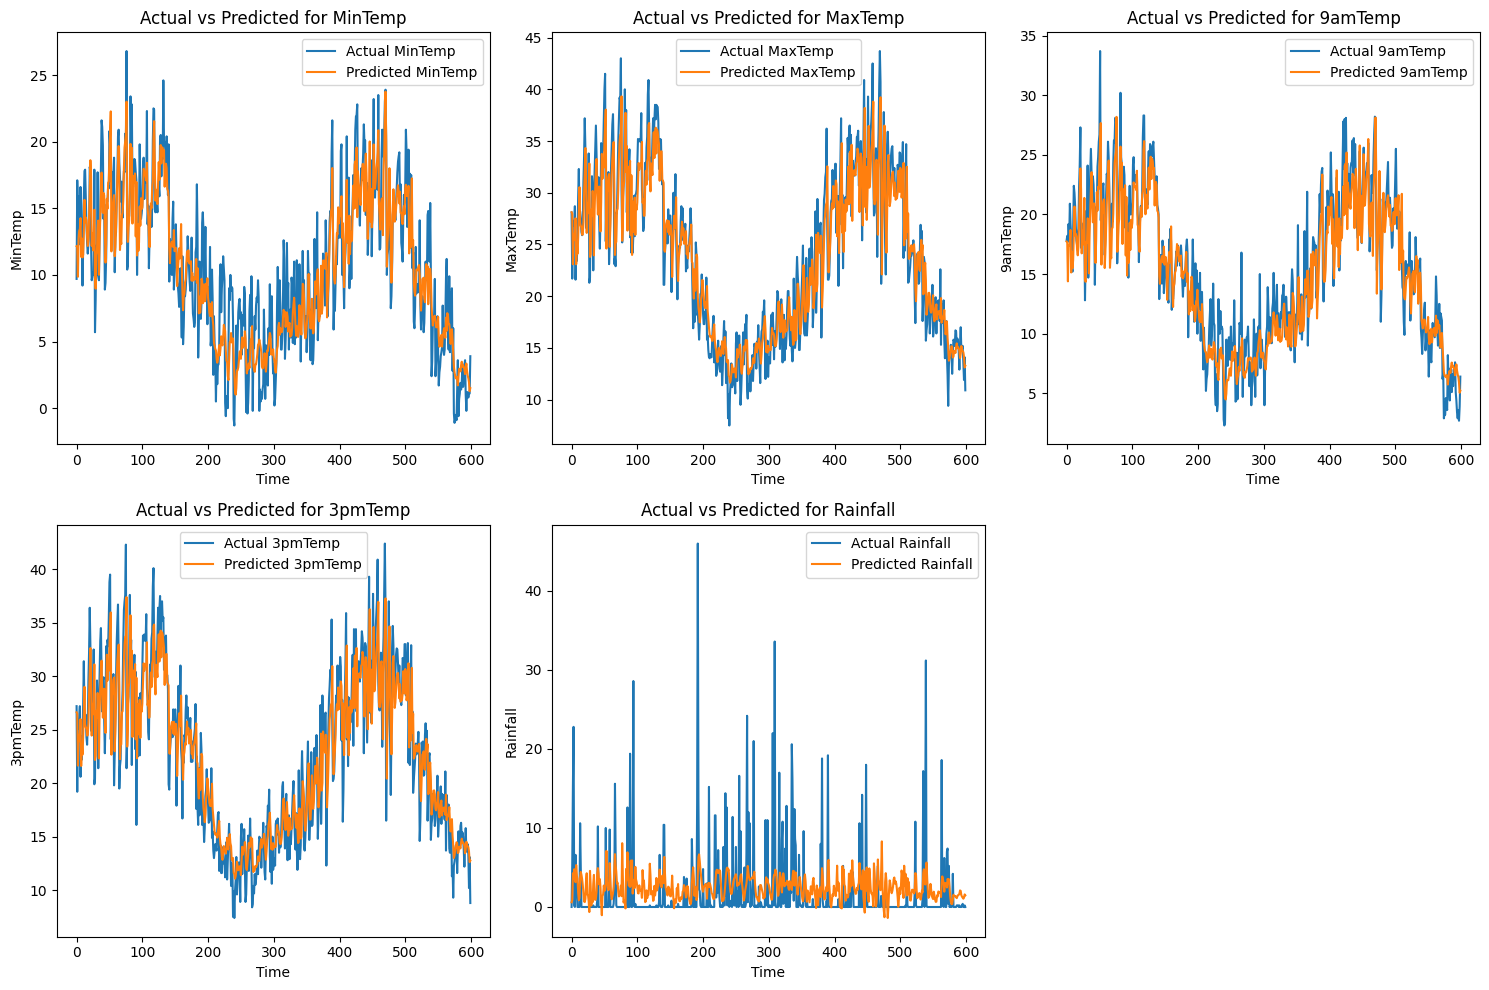

In [ ]:
# Number of features
num_features = len(features)

# Calculate the grid size (2 rows)
rows = 2
cols = (num_features + 1) // rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily index

for i, feature in enumerate(features):
    ax = axes[i]
    ax.plot(y_test_rescaled[:, i], label=f'Actual {feature}')
    ax.plot(predictions_rescaled[:, i], label=f'Predicted {feature}')
    ax.set_title(f'Actual vs Predicted for {feature}')
    ax.set_xlabel('Time')
    ax.set_ylabel(feature)
    ax.legend()

# Hide any extra subplots (if features < rows * cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Prédictions
predictions = model.predict(X_test)

# Inverser la normalisation pour interpréter les prédictions
predicted_values = scaler.inverse_transform(predictions)
true_values = scaler.inverse_transform(y_test)

# Afficher les résultats pour comparaison
results = pd.DataFrame({
    'True MinTemp': true_values[:, 0],
    'Predicted MinTemp': predicted_values[:, 0],
    'True MaxTemp': true_values[:, 1],
    'Predicted MaxTemp': predicted_values[:, 1],
    'True 9amTemp': true_values[:, 2],
    'Predicted 9amTemp': predicted_values[:, 2],
    'True 3pmTemp': true_values[:, 3],
    'Predicted 3pmTemp': predicted_values[:, 3],
    'True Rainfall': true_values[:, 4],
    'Predicted Rainfall': predicted_values[:, 4]
})

print(results.head())

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
   True MinTemp  Predicted MinTemp  True MaxTemp  Predicted MaxTemp  \
0           9.7          12.154454          28.1          28.117382   
1          17.1          12.108765          21.7          27.994757   
2          15.0           9.860971          27.3          23.087376   
3          15.9          12.701320          27.1          25.963114   
4          12.3          13.318496          26.8          25.463623   

   True 9amTemp  Predicted 9amTemp  True 3pmTemp  Predicted 3pmTemp  \
0          17.8          17.725628          27.2          26.623405   
1          18.2          17.656176          19.2          26.501171   
2          17.7          14.388327          26.0          21.642859   
3          19.2          17.362070          25.1          24.445391   
4          18.2          17.388321          26.1          23.917908   

   True Rainfall  Predicted Rainfall  
0            0.0            0.600169  
1            5.4            0

In [ ]:
# Prepare the last sequence from the training data for prediction
last_sequence = scaled_data.iloc[-seq_length:].values.reshape(1, seq_length, len(features))

# Make predictions
future_steps = 60

future_predictions = []

for _ in range(future_steps):
  next_day_prediction = model.predict(last_sequence)
  future_predictions.append(next_day_prediction[0])
  last_sequence = np.concatenate((last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, len(features))), axis=1)


# Rescale the predictions back to the original scale
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions))

# Print or visualize the predictions
print("Predictions for the next 15 days:")
future_predictions_rescaled

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

array([[ 1.3802524, 12.442349 ,  4.8188314, 11.913562 ,  2.213111 ],
       [ 1.6413295, 12.4485445,  4.983898 , 11.879796 ,  2.2807264],
       [ 1.8570877, 12.540782 ,  5.165117 , 11.936525 ,  2.2746356],
       [ 2.0249944, 12.615402 ,  5.31498  , 11.98894  ,  2.2718587],
       [ 2.1599672, 12.669316 ,  5.4353094, 12.030895 ,  2.288022 ],
       [ 2.2660697, 12.697755 ,  5.523471 , 12.054548 ,  2.3123405],
       [ 2.3337302, 12.718419 ,  5.596444 , 12.07469  ,  2.3427777],
       [ 2.382764 , 12.723076 ,  5.648548 , 12.083442 ,  2.356656 ],
       [ 2.4203243, 12.733498 ,  5.695095 , 12.099819 ,  2.3594499],
       [ 2.4561949, 12.756271 ,  5.7355294, 12.126296 ,  2.359632 ],
       [ 2.4732146, 12.787609 ,  5.782507 , 12.16179  ,  2.3553298],
       [ 2.489745 , 12.826925 ,  5.831133 , 12.20457  ,  2.34576  ],
       [ 2.5166357, 12.874375 ,  5.8759503, 12.253175 ,  2.3349206],
       [ 2.5442638, 12.932137 ,  5.9261627, 12.309284 ,  2.332344 ],
       [ 2.579138 , 12.982493 ,  5

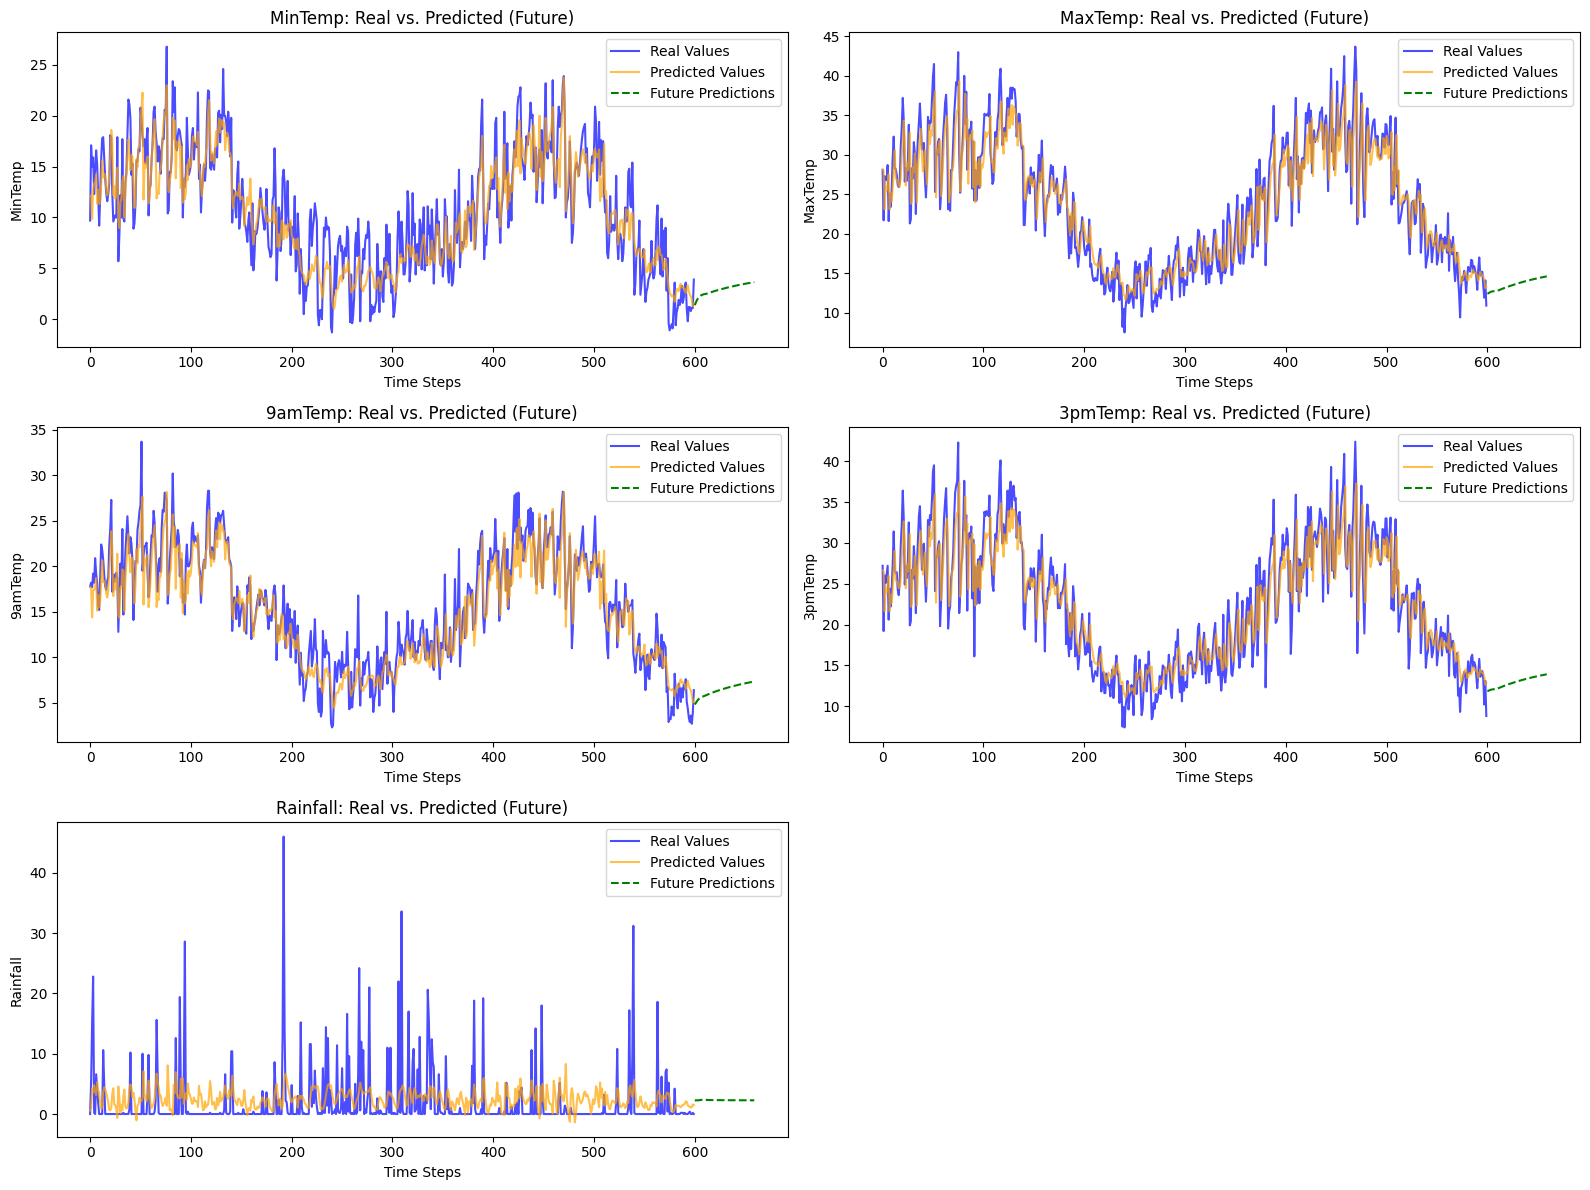

In [ ]:
import matplotlib.pyplot as plt

# Number of rows and columns for the grid
rows = 3
cols = (len(features) + 1) // rows

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

# Visualisation des valeurs réelles, prédites, et futures prédites pour chaque colonne
for i, feature in enumerate(features):
    ax = axes[i]

    # Tracer les valeurs réelles
    ax.plot(y_test_rescaled[:, i], label='Real Values', color='blue', alpha=0.7)

    # Tracer les valeurs prédites
    ax.plot(predicted_values[:, i], label='Predicted Values', color='orange', alpha=0.7)

    # Tracer les prédictions futures
    ax.plot(range(len(y_test_rescaled), len(y_test_rescaled) + future_steps),
            future_predictions_rescaled[:, i], label='Future Predictions', color='green', linestyle='--')

    # Ajouter le titre et les légendes
    ax.set_title(f"{feature}: Real vs. Predicted (Future)")
    ax.set_xlabel("Time Steps")
    ax.set_ylabel(feature)
    ax.legend()

# Hide any extra axes if the number of features is less than the grid size
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()